# **Creación de data tabular de la señales fisiológicas obtenidas en los laboratorios**

Las ondas son el producto de acción que se producen durante la estimulación cardiaca y se repiten de un latido a otro,por lo cual tienen las siguientes caracteristicas:
-La primera deflexión negativa va después de la onda Q,que dura menos de 0.03 segundos y abarca menos de 25% de la amplitud de la onda R.Luego la primera deflexión positiva posterior a la onda P es la onda R y la onda S es la primera deflexión negativa después de la onda R,para terminar esta las ondas T y U.Todas estas características se buscaron representar en la señales tomadas para poder analizar el cambio de amplitud de la ondas y su duración,por lo cual cada señal obtenida de ECG fue acotada ya que habían señales que otorgaban información ,oh que tenían mucho ruido por interferencia producido por movimiento del participante o por alguno músculo cercano a los sitios de colocación de los electrodos[1].

Referencia:
[1]	D. A. Moreno and J. Pegueroles, “PROJECTO FINAL DE CARRERA,” Upc.edu. [Online]. Available: https://upcommons.upc.edu/bitstream/handle/2117/98241/Memoria%20PFC.pdf?sequence=1&isAllowed=y. [Accessed: 27-Apr-2023].

In [1]:
#Importación de librerías
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from scipy.signal import firwin, lfilter
#from tqdm import tqdm

import scipy
from scipy import signal

from IPython.display import display
import sympy

In [2]:
def plot_sig(signal,n,titulo,xlim):
    Fs=1000
    t=n/Fs
    plt.plot(t,signal)
    plt.title("Señal"+titulo)
    plt.xlim(xlim)

In [3]:
#Seleccionamos estilo de ploteo
plt.style.use("ggplot")

In [4]:
def plotear(señal,lim1,lim2):
    plt.plot(señal)
    plt.xlim(lim1,lim2)

## Lectura de los datos

| Señal | array | data | observación
|----------|----------|----------|----------|
| Basal    | array1   | d_sensor1   | d_obs1   |
| Post-Ejercicio    | array2   | d_sensor2   | d_obs2   |
| Respiracion   | array3   | d_sensor3   | d_obs3   |
| RespiracionV2   | array4   | d_sensor4   | d_obs4   |



In [5]:
#Lectura de documento txt con tabulación (/t) como delimitador
array1 = np.genfromtxt("Lab4_Basal.txt", delimiter="\t")
array2 = np.genfromtxt("Lab4_PostEjercicio.txt", delimiter="\t")
array3 = np.genfromtxt("Lab4_Respiracion.txt", delimiter="\t")
array4 = np.genfromtxt("Lab4_RespiracionV2.txt", delimiter="\t")

In [6]:
#Nos quedamos con el dato del sensor
d_sensor1 = -1*array1[:,-2]
d_sensor2 = -1*array2[:,-2]
d_sensor3 = -1*array3[:,-2]
d_sensor4 = -1*array4[:,-2]

## Graficación de los datos

In [7]:
#plotear(d_sensor1,0,5000)

In [8]:
#plotear(d_sensor2,0,5000)

In [9]:
#plotear(d_sensor3,0,5000)

In [10]:
#plotear(d_sensor4,0,5000)

## Especificar la Frecuencia de muestreo 

In [11]:
Fs = 1000 #Frecuencia de muestreo del dispositivo de adquisición
Ts=1/Fs
n1 = np.arange(0,d_sensor1.shape[0])  # t = n*Ts
t1 = n1*Ts

n2 = np.arange(0,d_sensor2.shape[0])  # t = n*Ts
t2 = n2*Ts

n3 = np.arange(0,d_sensor3.shape[0])  # t = n*Ts
t3 = n3*Ts

n4 = np.arange(0,d_sensor4.shape[0])  # t = n*Ts
t4 = n4*Ts

In [12]:
#Ploteamos la señal en el tiempo
#plt.figure(figsize=(13,2)) #Modificamos el tamaño de la gráfica
#plt.plot(t1, d_sensor1)

In [13]:
#plt.figure(figsize=(13,2)) #Modificamos el tamaño de la gráfica
#plt.plot(t1, d_sensor1)

In [14]:
#plt.figure(figsize=(13,2)) #Modificamos el tamaño de la gráfica
#plt.plot(t1, d_sensor1)

In [15]:
#plt.figure(figsize=(13,2)) #Modificamos el tamaño de la gráfica
#plt.plot(t2, d_sensor2)

In [16]:
#plt.figure(figsize=(13,2)) #Modificamos el tamaño de la gráfica
#plt.plot(t3, d_sensor3)

In [17]:
#plt.figure(figsize=(13,2)) #Modificamos el tamaño de la gráfica
#plt.plot(t4, d_sensor4)

## Pasando el array a pandas para trabajarlo como series de tiempo

In [18]:
# Pase de array para trabajar como series de tiempo
#Pasamos las observaciones a filas correspondientes a una variable t y d_sensor
st_sensor1 = np.concatenate((t1.reshape(-1,1),  d_sensor1.reshape(-1,1)), axis=1)
st_sensor2 = np.concatenate((t2.reshape(-1,1),  d_sensor2.reshape(-1,1)), axis=1)
st_sensor3 = np.concatenate((t3.reshape(-1,1),  d_sensor3.reshape(-1,1)), axis=1)
st_sensor4 = np.concatenate((t4.reshape(-1,1),  d_sensor4.reshape(-1,1)), axis=1)

In [19]:
#Creamos el data frame con las varibles t y d_sensor
df1 = pd.DataFrame(st_sensor1, columns=["t","d_sensor1"])
df2 = pd.DataFrame(st_sensor2, columns=["t","d_sensor2"])
df3 = pd.DataFrame(st_sensor3, columns=["t","d_sensor3"])
df4 = pd.DataFrame(st_sensor4, columns=["t","d_sensor4"])

In [20]:
#Establecemos t como index 
df1 = df1.set_index("t")
df2 = df2.set_index("t")
df3 = df3.set_index("t")
df4 = df4.set_index("t")

In [21]:
#Ploteamos la señal
#df1.plot(figsize=(10,3))
#plt.xlim(0,2)


In [22]:
#df2.plot(figsize=(10,3))
#plt.xlim(0.41,0.84)

In [23]:
#df3.plot(figsize=(10,3))
#plt.xlim(0,1.2)

In [24]:
#df4.plot(figsize=(10,3))
#plt.xlim(1,2)

In [25]:
# Pase a data tabular con el estilo Sklearn
n1=df1.index.max()/1
s1=df1.shape[0]/60
#print(n1,s1)

In [26]:
n2=df2.index.max()/1
s2=df2.shape[0]/35
#print(n2,s2)

In [27]:
n3=df3.index.max()/0.6
s3=df3.shape[0]/99
#print(n3,s3)

In [28]:
n4=df4.index.max()/0.6
s4=df4.shape[0]/99
#print(n4,s4)

In [29]:
d_obs1 = df1[["d_sensor1"]].values.reshape(60,705)
#plt.figure(figsize=(13,2))
#plt.plot(d_obs1[0])

In [30]:
d_obs2 = df2[["d_sensor2"]].values.reshape(50,717)
#plt.figure(figsize=(13,2))
#plt.plot(d_obs2[8])

In [31]:
d_obs3 = df3[["d_sensor3"]].values.reshape(99,600)
#plt.figure(figsize=(13,2))
#plt.plot(d_obs3[15])

In [32]:
d_obs4 = df4[["d_sensor4"]].values.reshape(99,600)
#plt.figure(figsize=(13,2))
#plt.plot(d_obs4[6])

## Descripción de categoria de los ejercicios realizado en la clase de ECG

| Descripción | Categoria |
|----------|----------|
| Basal    | 1   |
| Post-Ejercicio    | 2   |
| Respiracion   | 3   | 
| RespiracionV2   | 4   | 



In [33]:
target_1=np.repeat(1,d_obs1.shape[0])
target_2=np.repeat(2,d_obs1.shape[0])
target_3=np.repeat(3,d_obs1.shape[0])
target_4=np.repeat(4,d_obs1.shape[0])

ecg={"1":[d_obs1,target_1],"2":[d_obs2,target_2],"3":[d_obs3,target_3],"4":[d_obs4,target_4]}
ecg


{'1': [array([[-492., -489., -487., ..., -519., -519., -523.],
         [-520., -519., -519., ..., -547., -540., -529.],
         [-527., -530., -535., ..., -529., -537., -545.],
         ...,
         [-543., -537., -529., ..., -545., -543., -545.],
         [-546., -546., -543., ..., -483., -485., -490.],
         [-492., -487., -482., ..., -502., -504., -507.]]),
  array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])],
 '2': [array([[-367., -363., -356., ..., -498., -499., -493.],
         [-488., -484., -481., ..., -519., -521., -515.],
         [-509., -504., -495., ..., -569., -577., -577.],
         ...,
         [-375., -379., -372., ..., -480., -485., -492.],
         [-503., -502., -497., ..., -562., -574., -585.],
         [-584., -575., -567., ..., -516., -512., -508.]]),
  array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2

FILTROS

¿Por qué se eligieron estos filtros?
- Filtro IIR (Butterworth): Es un filtro que no presenta rizos; es decir, no introduce distorsiones en las frecuencias dentro de la banda de paso. Asimismo, como queremos preservar la forma de la onda de la señal este filtro es el indicado, ya que, presenta una fase lineal en la banda de paso, además de su alta capacidad de atenuación de las frecuencias no deseadas.

- Filtro FIR 1 (Hamming): El diseño de filtros hamming en python no es complejo. Este tipo de filtro no presenta oscilaciones en la respuesta en frecuencia y es posible controlar los parámetros de este de forma precisa. Asimismo, la pendiente en la banda de paso no es demasiada como para que deje de filtrar señales a frecuencias no deseada. Además, la atenuación de las señales de frecuencias más altas es lo suficiente pequeña en relación con la región de transición. Es decir, esta región no es muy grande comparada con otros tipos de filtros FIR, y la atenuación es suficiente para que las señales filtradas no se muestren

- Filtro FIR 2 (Blackman): El filtro blakman tiene una caida mas pronunciada a comparación del Hamming o Hanning, esto quiere decir que su ancho de banda es menor al de los otros. Por lo que permitiria aumentar la resolución de una región mas especifica de la señal asi como disminuir la filtración espectral.

FIR Hamming

In [34]:
N=1024

## Diseño de filtro pasa baja con enventanado Hamming ##

Fs=1000
M=25
Fc=20
Fs=1000

wc=2*np.pi*Fc/Fs

w=firwin(numtaps=M,cutoff=Fc,window='hamming',fs=Fs)
w=np.round(w,3)

## Creación de nuevo diccionario para señales filtradas FIR por enventanado tipo hamming

ecg_FIR_hamm={}     

for i in ecg:
    conj_señal=ecg[i][0]
    obs=[]
    tar=[]
    for j in conj_señal:
        J=lfilter(w, np.array(1),j)
        obs.append(J)
        tar.append(int(i))

    obs_ar=np.array(obs)
    tar_ar=np.array(tar)
    ecg_FIR_hamm.update({f"{i}":[obs_ar,tar_ar]})
        
#ecg_FIR_hamm


FIR Blackman

In [35]:
M=10
Fc=80
wc = 2*np.pi*Fc/Fs
w = firwin(numtaps=M, cutoff=Fc, window='blackman', fs=Fs)
w = np.round(w,3)

ecg_FIR_black={} 

for i in ecg:
    conj_señal=ecg[i][0]
    obs=[]
    tar=[]
    for j in conj_señal:
        J=lfilter(w, np.array(1),j)
        obs.append(J)
        tar.append(int(i))

    obs_ar=np.array(obs)
    tar_ar=np.array(tar)
    ecg_FIR_black.update({f"{i}":[obs_ar,tar_ar]})

#ecg_FIR_black

IIR Buttord

In [36]:
N=2**10

wp=2*np.pi*94
ws=2*np.pi*157
# Butterworth:          B.transit   B.pass   B.stop
N_ord, Wc= signal.buttord(wp, ws, gpass=3, gstop=40, analog=True) #gpass=loss in passband edge frecuencies, gstop= attenuation in stopband edge frecuencies 
# Se obtuvieron dos datos: Wc y N_ord
fc = 20

b,a = scipy.signal.butter(N_ord, Wc, 'lowpass', True, 'ba')
bd,ad = signal.bilinear(b,a,Fs)

## Creación de nuevo diccionario para señales filtradas IIR

ecg_IIR_buttord={}     

for i in ecg:
    conj_señal=ecg[i][0]
    obs=[]
    tar=[]
    for j in conj_señal:
        J=scipy.signal.lfilter(bd,ad,j)
        obs.append(J)
        tar.append(int(i))

    obs_ar=np.array(obs)
    tar_ar=np.array(tar)
    ecg_IIR_buttord.update({f"{i}":[obs_ar,tar_ar]})

#ecg_IIR_buttord

PLOTEO DE SEÑALES

In [37]:
signal_basal=ecg["1"][0][0]
signal_resp=ecg["3"][0][0]
signal_post_ej=ecg["2"][0][0]


Mb=len(signal_basal)
nb=np.arange(Mb)

Mr=len(signal_resp)
nr=np.arange(Mr)

Mpe=len(signal_post_ej)
npe=np.arange(Mpe)

In [38]:
signal_basal_FIR_H=ecg_FIR_hamm["1"][0][0]
signal_resp_FIR_H=ecg_FIR_hamm["3"][0][0]
signal_post_ej_FIR_H=ecg_FIR_hamm["2"][0][0]

Mbf=len(signal_basal_FIR_H)
nbf=np.arange(Mbf)

Mrf=len(signal_resp_FIR_H)
nrf=np.arange(Mrf)

Mpf=len(signal_post_ej_FIR_H)
npf=np.arange(Mpf)

In [39]:
signal_basal_FIR_B=ecg_FIR_black["1"][0][0]
signal_resp_FIR_B=ecg_FIR_black["3"][0][0]
signal_post_ej_FIR_B=ecg_FIR_black["2"][0][0]

Mbf=len(signal_basal_FIR_B)
nbf=np.arange(Mbf)

Mrf=len(signal_resp_FIR_B)
nrf=np.arange(Mrf)

Mpf=len(signal_post_ej_FIR_B)
npf=np.arange(Mpf)

In [40]:
signal_basal_IIR=ecg_IIR_buttord["1"][0][0]
signal_resp_IIR=ecg_IIR_buttord["3"][0][0]
signal_post_ej_IIR=ecg_IIR_buttord["2"][0][0]

Mbi=len(signal_basal_IIR)
nbi=np.arange(Mbi)

Mri=len(signal_resp_IIR)
nri=np.arange(Mri)

Mpi=len(signal_post_ej_IIR)
npi=np.arange(Mpi)

PARA BASAL

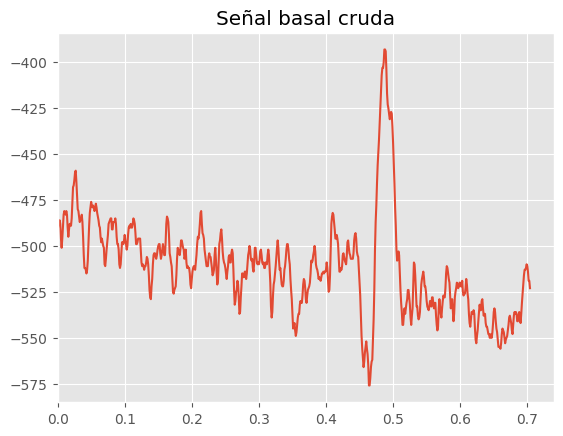

In [41]:
# Señal cruda #

plot_sig(signal_basal,nb," basal cruda",0)

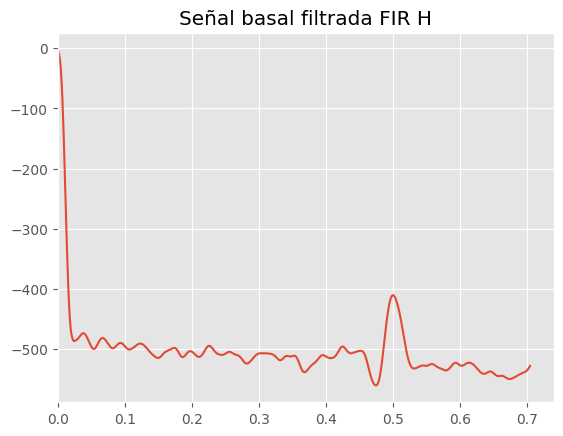

In [42]:
# señal filtrada FIR #
plot_sig(signal_basal_FIR_H,nbf," basal filtrada FIR H",0)

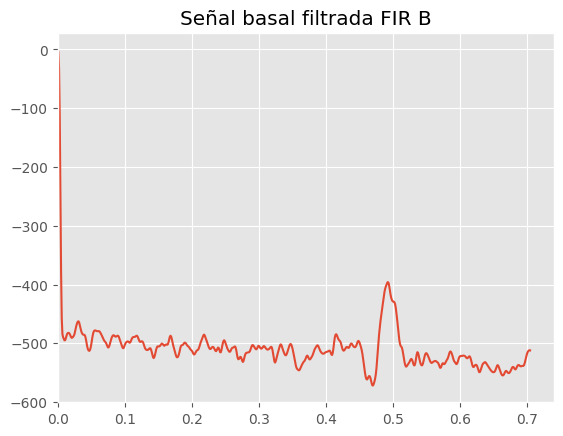

In [43]:
plot_sig(signal_basal_FIR_B,nbf," basal filtrada FIR B",0)

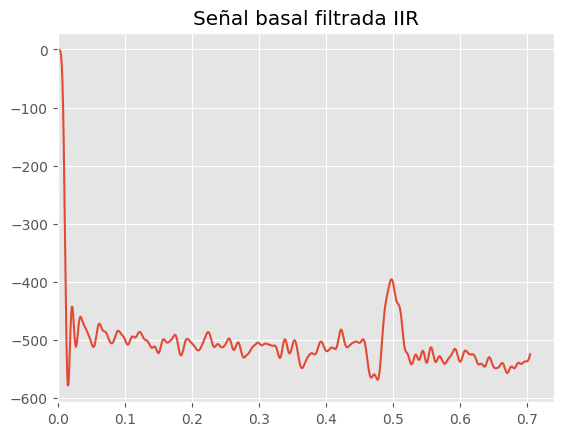

In [44]:
# señal filtrada IIR #
plot_sig(signal_basal_IIR,nbi," basal filtrada IIR",0)

PARA RESPIRACION

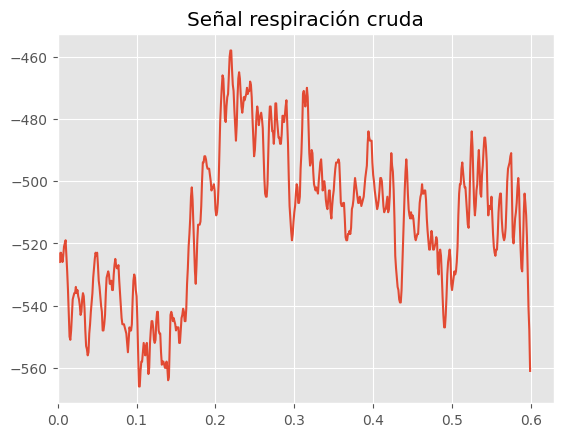

In [45]:
# Señal cruda #

plot_sig(signal_resp,nr," respiración cruda",0)

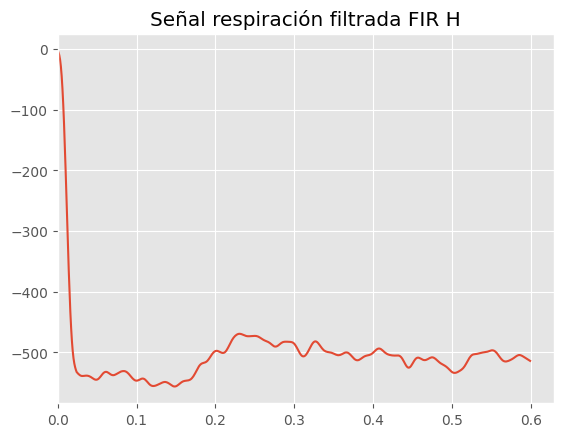

In [46]:
# señal filtrada FIR #
plot_sig(signal_resp_FIR_H,nrf," respiración filtrada FIR H",0)

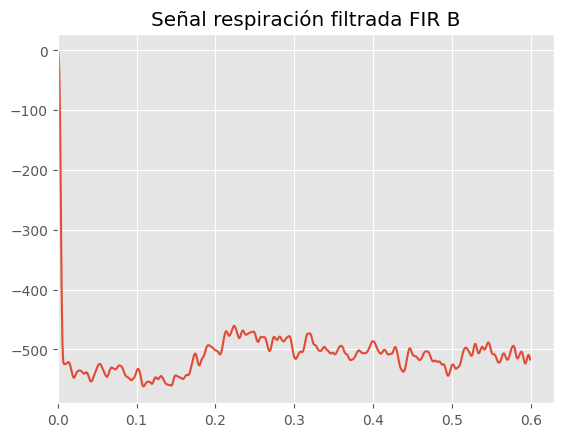

In [47]:
plot_sig(signal_resp_FIR_B,nrf," respiración filtrada FIR B",0)

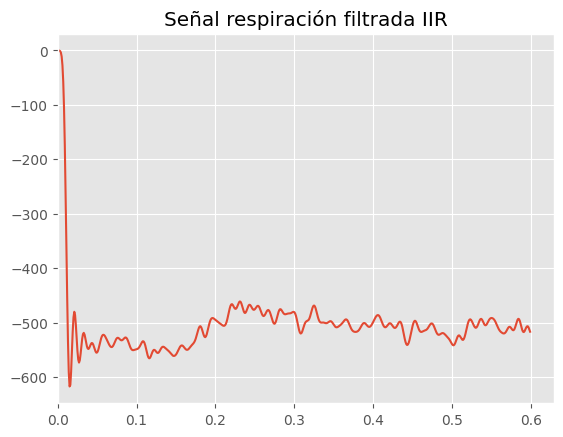

In [48]:
# señal filtrada IIR #
plot_sig(signal_resp_IIR,nri," respiración filtrada IIR",0)

PARA POST EJERCICIO

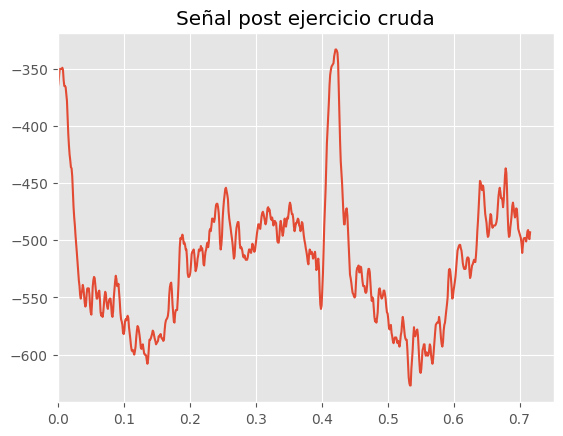

In [49]:
# Señal cruda #

plot_sig(signal_post_ej,npe," post ejercicio cruda",0)

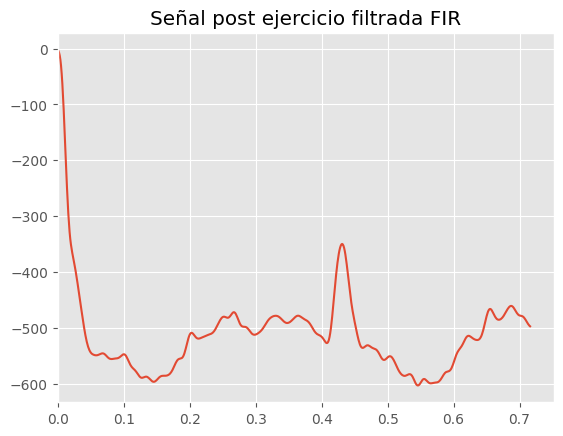

In [50]:
# señal filtrada FIR #
plot_sig(signal_post_ej_FIR_H,npf," post ejercicio filtrada FIR",0)

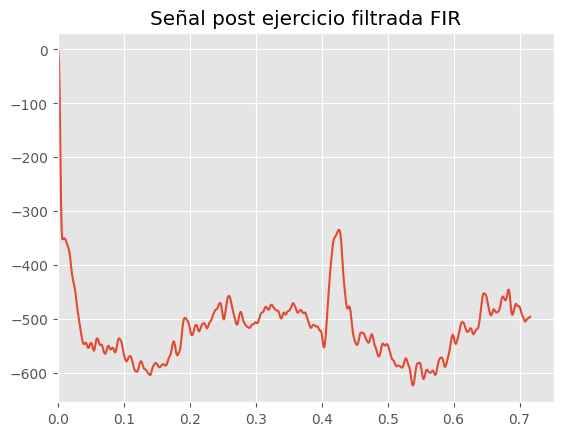

In [51]:
plot_sig(signal_post_ej_FIR_B,npf," post ejercicio filtrada FIR",0)

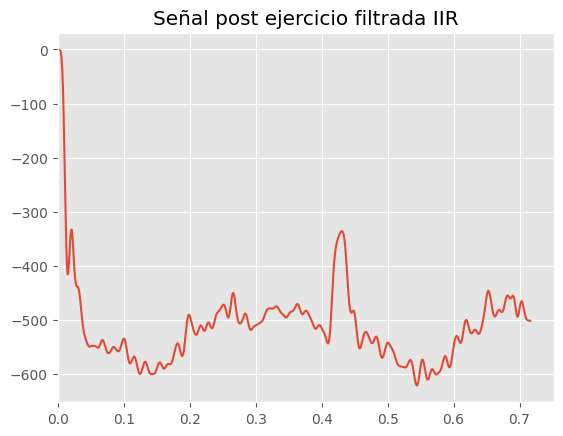

In [52]:
# señal filtrada IIR #
plot_sig(signal_post_ej_IIR,npi," post ejercicio filtrada IIR",0)

| Campo | Señal Cruda | Filtro IIR | Filtro FIR 1 | Filtro FIR 2|
|----------|----------|----------|----------|----------|
| Basal    | <img width="300" height="150" src="https://user-images.githubusercontent.com/89707896/236255855-a51a2dbc-218e-47bb-994a-1fe34bb98898.jpeg"> |  <img width="300" height="150" src="https://user-images.githubusercontent.com/89707896/236256850-9c3e637e-8b25-4cbc-984f-f19a7127547f.jpeg">    | <img width="300" height="150" src="https://user-images.githubusercontent.com/89707896/236259370-9c92b3b3-1a0c-4a89-90f8-0d90478d289e.jpeg">     | <img width="300" height="150" src="https://user-images.githubusercontent.com/89707896/236266646-f7c04a23-c12e-42bd-8224-8c7c811ec986.jpeg">     |
| Post-Ejercicio    | <img width="300" height="150" src="https://user-images.githubusercontent.com/89707896/236255188-492cc48d-24e5-4fa7-9805-bee75a721d1b.jpeg">  |       <img width="300" height="150" src="https://user-images.githubusercontent.com/89707896/236257867-b8b9a6ba-00b9-449b-b99f-a6531712ee59.jpeg">        |       <img width="300" height="150" src="https://user-images.githubusercontent.com/89707896/236259161-927fc0b4-de48-4ab7-9785-4cecbaf262e9.jpeg">           |       <img width="300" height="150" src="https://user-images.githubusercontent.com/89707896/236266762-581677c3-907a-49ba-a01d-aebc662e3eab.jpeg">           |
| Respiracion   | <img width="300" height="150" src="https://user-images.githubusercontent.com/89707896/236255960-8d9e64a7-7821-418d-b876-e458bdb7fc53.jpeg">  |       <img width="300" height="150" src="https://user-images.githubusercontent.com/89707896/236257152-7e10cc31-534f-46f1-8ee8-37b18ed955ff.jpeg">        |       <img width="300" height="150" src="https://user-images.githubusercontent.com/89707896/236259038-376010de-864e-4112-9c55-b2faca169894.jpeg">           |       <img width="300" height="150" src="https://user-images.githubusercontent.com/89707896/236266786-6f067e29-d190-490c-a5ef-ecae7316c239.jpeg">           |